# Planning Agents with LangGraph and Together AI

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/togethercomputer/together-cookbook/blob/main/Agents/LangGraph/LangGraph_Planning_Agent.ipynb)

<img src="https://github.com/togethercomputer/together-cookbook/blob/main/images/langgraph.png?raw=1" width="700">

This notebook demonstrates how to create an intelligent planning agent that can:
1. Break down complex queries into smaller, manageable steps
2. Execute each step sequentially
3. Adapt its plan based on new information
4. Provide coherent final answers

## Setup and Imports

In [4]:
# Install required packages
!pip install -qU duckduckgo-search langchain-together langchain-community tavily-python langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 36.5 MB/s eta 0:00:00


In [46]:
! pip install together

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.9/87.9 kB 2.6 MB/s eta 0:00:00


We initialize the LLM using Together AI's Llama model. This will be our core reasoning engine

In [67]:
# Setting up the Language Model


from langchain_community.tools import DuckDuckGoSearchRun, DuckDuckGoSearchResults
from langchain_community.utilities import DuckDuckGoSearchAPIWrapper

search = DuckDuckGoSearchResults()

#result = search.invoke("what is grab's highest stock price in april 2025?", max_result=2)
#len(result), result


search = DuckDuckGoSearchResults(api_wrapper=DuckDuckGoSearchAPIWrapper(max_results=7))
result = search.invoke("what is grab's stock price")
len(result), result

(1997,
 "snippet: Lee Kuan Yew (born September 16, 1923, Singapore—died March 23, 2015, Singapore) was a politician and lawyer who was prime minister of Singapore from 1959 to 1990. Widely regarded as the founding father of modern Singapore, Lee transformed the city-state from a small, resource-deficient British colony with high rates of illiteracy into the most prosperous country in Southeast Asia., title: Lee Kuan Yew | Biography, Education, Achievements, & Facts - Britannica, link: https://www.britannica.com/biography/Lee-Kuan-Yew, snippet: A Short Biography of Lee Kuan Yew. Lee Kuan Yew was born on September 16, 1923, as the eldest child of Lee Chin Koon. He studied in the top Singapore schools and went to the London School of Economics briefly for his university education before moving to Cambridge, where he obtained his Law degree., title: Lee Kuan Yew: How His Leadership Transformed Singapore, link: https://www.businessandleadership.com/leadership/item/lee-kuan-yew-leadership-tr

In [72]:
# Setting up the search tool
from langchain_community.tools import DuckDuckGoSearchResults
from langchain_community.utilities import DuckDuckGoSearchAPIWrapper

# Create the search tool with more results
search = DuckDuckGoSearchResults(api_wrapper=DuckDuckGoSearchAPIWrapper(max_results=7))
search_results = search.invoke("what is grab's stock price")

# Format the search results as context
context = "Here's some information about Grab's stock price:\n" + '\n'.join([str(item) for item in search_results])

# Use Together API with the chat completions interface
from together import Together

client = Together(api_key="f43aa597975ad007ba3d1058ec3287743e7982ceab574de53f65adf5b613b900")  # Replace with your actual API key

response = client.chat.completions.create(
    model="meta-llama/Llama-Vision-Free",
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant. Use the provided information to answer questions."
        },
        {
            "role": "user",
            "content": f"{context}\n\nBased on this information, what is Grab's current stock price?"
        }
    ],
)

print(response.choices[0].message.content)

According to the text, Grab's current stock price is:

* $2.91 (52-week low)
* $4.68 (current price)
* $4.72 (current price at the beginning of the year)
* $4.07 (current price after a 13.8% decrease)

So, the current stock price of Grab is $4.07.


In [70]:
%time

from together import Together

client = Together(api_key="f43aa597975ad007ba3d1058ec3287743e7982ceab574de53f65adf5b613b900")

response = client.chat.completions.create(
    model="meta-llama/Llama-Vision-Free",
    messages=[
      {
        "role": "user",
        "content": "who is lee kwan yew"
      },
      {
        "role": "system",
        "prompt": result
      }
    ],
)

response.choices[0].message.content

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 9.54 µs


InvalidRequestError: Error code: 400 - {"message": "[{'type': 'missing', 'loc': ('body', 'messages', 1, 'typed-dict', 'content'), 'msg': 'Field required', 'input': {'role': 'system', 'prompt': \"snippet: Lee Kuan Yew (born September 16, 1923, Singapore\u2014died March 23, 2015, Singapore) was a politician and lawyer who was prime minister of Singapore from 1959 to 1990. Widely regarded as the founding father of modern Singapore, Lee transformed the city-state from a small, resource-deficient British colony with high rates of illiteracy into the most prosperous country in Southeast Asia., title: Lee Kuan Yew | Biography, Education, Achievements, & Facts - Britannica, link: https://www.britannica.com/biography/Lee-Kuan-Yew, snippet: A Short Biography of Lee Kuan Yew. Lee Kuan Yew was born on September 16, 1923, as the eldest child of Lee Chin Koon. He studied in the top Singapore schools and went to the London School of Economics briefly for his university education before moving to Cambridge, where he obtained his Law degree., title: Lee Kuan Yew: How His Leadership Transformed Singapore, link: https://www.businessandleadership.com/leadership/item/lee-kuan-yew-leadership-transformed-singapore/, snippet: SINGAPORE - On the 10th anniversary of Mr Lee Kuan Yew's death, Prime Minister Lawrence Wong called on Singaporeans to honour the legacy of Singapore's founding father through their actions., title: Honour Lee Kuan Yew's legacy not just in ... - The Straits Times, link: https://www.straitstimes.com/singapore/honour-lee-kuan-yews-legacy-not-just-in-remembrance-but-in-action-pm-wong, snippet: Lee Kuan Yew entered politics in 1955 as a legislator for the Tanjong Pagar Single Member Constituency (SMC), a seat he would hold for 56 years until its absorption into Tanjong Pagar GRC in 1991. His early career was defined by anti-colonial activism and the formation of the People's Action Party (PAP) in 1954, which sought to dismantle ..., title: The Late Mr Lee Kuan Yew's Life and Death While in Elected Office: A ..., link: https://batamnewsasia.com/2025/02/25/the-late-mr-lee-kuan-yews-life-and-death-while-in-elected-office-a-much-discussed-and-enduring-political-legacy/\"}}, {'type': 'extra_forbidden', 'loc': ('body', 'messages', 1, 'typed-dict', 'prompt'), 'msg': 'Extra inputs are not permitted', 'input': \"snippet: Lee Kuan Yew (born September 16, 1923, Singapore\u2014died March 23, 2015, Singapore) was a politician and lawyer who was prime minister of Singapore from 1959 to 1990. Widely regarded as the founding father of modern Singapore, Lee transformed the city-state from a small, resource-deficient British colony with high rates of illiteracy into the most prosperous country in Southeast Asia., title: Lee Kuan Yew | Biography, Education, Achievements, & Facts - Britannica, link: https://www.britannica.com/biography/Lee-Kuan-Yew, snippet: A Short Biography of Lee Kuan Yew. Lee Kuan Yew was born on September 16, 1923, as the eldest child of Lee Chin Koon. He studied in the top Singapore schools and went to the London School of Economics briefly for his university education before moving to Cambridge, where he obtained his Law degree., title: Lee Kuan Yew: How His Leadership Transformed Singapore, link: https://www.businessandleadership.com/leadership/item/lee-kuan-yew-leadership-transformed-singapore/, snippet: SINGAPORE - On the 10th anniversary of Mr Lee Kuan Yew's death, Prime Minister Lawrence Wong called on Singaporeans to honour the legacy of Singapore's founding father through their actions., title: Honour Lee Kuan Yew's legacy not just in ... - The Straits Times, link: https://www.straitstimes.com/singapore/honour-lee-kuan-yews-legacy-not-just-in-remembrance-but-in-action-pm-wong, snippet: Lee Kuan Yew entered politics in 1955 as a legislator for the Tanjong Pagar Single Member Constituency (SMC), a seat he would hold for 56 years until its absorption into Tanjong Pagar GRC in 1991. His early career was defined by anti-colonial activism and the formation of the People's Action Party (PAP) in 1954, which sought to dismantle ..., title: The Late Mr Lee Kuan Yew's Life and Death While in Elected Office: A ..., link: https://batamnewsasia.com/2025/02/25/the-late-mr-lee-kuan-yews-life-and-death-while-in-elected-office-a-much-discussed-and-enduring-political-legacy/\"}, {'type': 'missing', 'loc': ('body', 'messages', 1, 'typed-dict', 'content'), 'msg': 'Field required', 'input': {'role': 'system', 'prompt': \"snippet: Lee Kuan Yew (born September 16, 1923, Singapore\u2014died March 23, 2015, Singapore) was a politician and lawyer who was prime minister of Singapore from 1959 to 1990. Widely regarded as the founding father of modern Singapore, Lee transformed the city-state from a small, resource-deficient British colony with high rates of illiteracy into the most prosperous country in Southeast Asia., title: Lee Kuan Yew | Biography, Education, Achievements, & Facts - Britannica, link: https://www.britannica.com/biography/Lee-Kuan-Yew, snippet: A Short Biography of Lee Kuan Yew. Lee Kuan Yew was born on September 16, 1923, as the eldest child of Lee Chin Koon. He studied in the top Singapore schools and went to the London School of Economics briefly for his university education before moving to Cambridge, where he obtained his Law degree., title: Lee Kuan Yew: How His Leadership Transformed Singapore, link: https://www.businessandleadership.com/leadership/item/lee-kuan-yew-leadership-transformed-singapore/, snippet: SINGAPORE - On the 10th anniversary of Mr Lee Kuan Yew's death, Prime Minister Lawrence Wong called on Singaporeans to honour the legacy of Singapore's founding father through their actions., title: Honour Lee Kuan Yew's legacy not just in ... - The Straits Times, link: https://www.straitstimes.com/singapore/honour-lee-kuan-yews-legacy-not-just-in-remembrance-but-in-action-pm-wong, snippet: Lee Kuan Yew entered politics in 1955 as a legislator for the Tanjong Pagar Single Member Constituency (SMC), a seat he would hold for 56 years until its absorption into Tanjong Pagar GRC in 1991. His early career was defined by anti-colonial activism and the formation of the People's Action Party (PAP) in 1954, which sought to dismantle ..., title: The Late Mr Lee Kuan Yew's Life and Death While in Elected Office: A ..., link: https://batamnewsasia.com/2025/02/25/the-late-mr-lee-kuan-yews-life-and-death-while-in-elected-office-a-much-discussed-and-enduring-political-legacy/\"}}, {'type': 'literal_error', 'loc': ('body', 'messages', 1, 'typed-dict', 'role'), 'msg': \"Input should be 'user'\", 'input': 'system', 'ctx': {'expected': \"'user'\"}}, {'type': 'extra_forbidden', 'loc': ('body', 'messages', 1, 'typed-dict', 'prompt'), 'msg': 'Extra inputs are not permitted', 'input': \"snippet: Lee Kuan Yew (born September 16, 1923, Singapore\u2014died March 23, 2015, Singapore) was a politician and lawyer who was prime minister of Singapore from 1959 to 1990. Widely regarded as the founding father of modern Singapore, Lee transformed the city-state from a small, resource-deficient British colony with high rates of illiteracy into the most prosperous country in Southeast Asia., title: Lee Kuan Yew | Biography, Education, Achievements, & Facts - Britannica, link: https://www.britannica.com/biography/Lee-Kuan-Yew, snippet: A Short Biography of Lee Kuan Yew. Lee Kuan Yew was born on September 16, 1923, as the eldest child of Lee Chin Koon. He studied in the top Singapore schools and went to the London School of Economics briefly for his university education before moving to Cambridge, where he obtained his Law degree., title: Lee Kuan Yew: How His Leadership Transformed Singapore, link: https://www.businessandleadership.com/leadership/item/lee-kuan-yew-leadership-transformed-singapore/, snippet: SINGAPORE - On the 10th anniversary of Mr Lee Kuan Yew's death, Prime Minister Lawrence Wong called on Singaporeans to honour the legacy of Singapore's founding father through their actions., title: Honour Lee Kuan Yew's legacy not just in ... - The Straits Times, link: https://www.straitstimes.com/singapore/honour-lee-kuan-yews-legacy-not-just-in-remembrance-but-in-action-pm-wong, snippet: Lee Kuan Yew entered politics in 1955 as a legislator for the Tanjong Pagar Single Member Constituency (SMC), a seat he would hold for 56 years until its absorption into Tanjong Pagar GRC in 1991. His early career was defined by anti-colonial activism and the formation of the People's Action Party (PAP) in 1954, which sought to dismantle ..., title: The Late Mr Lee Kuan Yew's Life and Death While in Elected Office: A ..., link: https://batamnewsasia.com/2025/02/25/the-late-mr-lee-kuan-yews-life-and-death-while-in-elected-office-a-much-discussed-and-enduring-political-legacy/\"}, {'type': 'literal_error', 'loc': ('body', 'messages', 1, 'typed-dict', 'role'), 'msg': \"Input should be 'assistant'\", 'input': 'system', 'ctx': {'expected': \"'assistant'\"}}, {'type': 'extra_forbidden', 'loc': ('body', 'messages', 1, 'typed-dict', 'prompt'), 'msg': 'Extra inputs are not permitted', 'input': \"snippet: Lee Kuan Yew (born September 16, 1923, Singapore\u2014died March 23, 2015, Singapore) was a politician and lawyer who was prime minister of Singapore from 1959 to 1990. Widely regarded as the founding father of modern Singapore, Lee transformed the city-state from a small, resource-deficient British colony with high rates of illiteracy into the most prosperous country in Southeast Asia., title: Lee Kuan Yew | Biography, Education, Achievements, & Facts - Britannica, link: https://www.britannica.com/biography/Lee-Kuan-Yew, snippet: A Short Biography of Lee Kuan Yew. Lee Kuan Yew was born on September 16, 1923, as the eldest child of Lee Chin Koon. He studied in the top Singapore schools and went to the London School of Economics briefly for his university education before moving to Cambridge, where he obtained his Law degree., title: Lee Kuan Yew: How His Leadership Transformed Singapore, link: https://www.businessandleadership.com/leadership/item/lee-kuan-yew-leadership-transformed-singapore/, snippet: SINGAPORE - On the 10th anniversary of Mr Lee Kuan Yew's death, Prime Minister Lawrence Wong called on Singaporeans to honour the legacy of Singapore's founding father through their actions., title: Honour Lee Kuan Yew's legacy not just in ... - The Straits Times, link: https://www.straitstimes.com/singapore/honour-lee-kuan-yews-legacy-not-just-in-remembrance-but-in-action-pm-wong, snippet: Lee Kuan Yew entered politics in 1955 as a legislator for the Tanjong Pagar Single Member Constituency (SMC), a seat he would hold for 56 years until its absorption into Tanjong Pagar GRC in 1991. His early career was defined by anti-colonial activism and the formation of the People's Action Party (PAP) in 1954, which sought to dismantle ..., title: The Late Mr Lee Kuan Yew's Life and Death While in Elected Office: A ..., link: https://batamnewsasia.com/2025/02/25/the-late-mr-lee-kuan-yews-life-and-death-while-in-elected-office-a-much-discussed-and-enduring-political-legacy/\"}, {'type': 'missing', 'loc': ('body', 'messages', 1, 'typed-dict', 'content'), 'msg': 'Field required', 'input': {'role': 'system', 'prompt': \"snippet: Lee Kuan Yew (born September 16, 1923, Singapore\u2014died March 23, 2015, Singapore) was a politician and lawyer who was prime minister of Singapore from 1959 to 1990. Widely regarded as the founding father of modern Singapore, Lee transformed the city-state from a small, resource-deficient British colony with high rates of illiteracy into the most prosperous country in Southeast Asia., title: Lee Kuan Yew | Biography, Education, Achievements, & Facts - Britannica, link: https://www.britannica.com/biography/Lee-Kuan-Yew, snippet: A Short Biography of Lee Kuan Yew. Lee Kuan Yew was born on September 16, 1923, as the eldest child of Lee Chin Koon. He studied in the top Singapore schools and went to the London School of Economics briefly for his university education before moving to Cambridge, where he obtained his Law degree., title: Lee Kuan Yew: How His Leadership Transformed Singapore, link: https://www.businessandleadership.com/leadership/item/lee-kuan-yew-leadership-transformed-singapore/, snippet: SINGAPORE - On the 10th anniversary of Mr Lee Kuan Yew's death, Prime Minister Lawrence Wong called on Singaporeans to honour the legacy of Singapore's founding father through their actions., title: Honour Lee Kuan Yew's legacy not just in ... - The Straits Times, link: https://www.straitstimes.com/singapore/honour-lee-kuan-yews-legacy-not-just-in-remembrance-but-in-action-pm-wong, snippet: Lee Kuan Yew entered politics in 1955 as a legislator for the Tanjong Pagar Single Member Constituency (SMC), a seat he would hold for 56 years until its absorption into Tanjong Pagar GRC in 1991. His early career was defined by anti-colonial activism and the formation of the People's Action Party (PAP) in 1954, which sought to dismantle ..., title: The Late Mr Lee Kuan Yew's Life and Death While in Elected Office: A ..., link: https://batamnewsasia.com/2025/02/25/the-late-mr-lee-kuan-yews-life-and-death-while-in-elected-office-a-much-discussed-and-enduring-political-legacy/\"}}, {'type': 'literal_error', 'loc': ('body', 'messages', 1, 'typed-dict', 'role'), 'msg': \"Input should be 'tool'\", 'input': 'system', 'ctx': {'expected': \"'tool'\"}}, {'type': 'missing', 'loc': ('body', 'messages', 1, 'typed-dict', 'tool_call_id'), 'msg': 'Field required', 'input': {'role': 'system', 'prompt': \"snippet: Lee Kuan Yew (born September 16, 1923, Singapore\u2014died March 23, 2015, Singapore) was a politician and lawyer who was prime minister of Singapore from 1959 to 1990. Widely regarded as the founding father of modern Singapore, Lee transformed the city-state from a small, resource-deficient British colony with high rates of illiteracy into the most prosperous country in Southeast Asia., title: Lee Kuan Yew | Biography, Education, Achievements, & Facts - Britannica, link: https://www.britannica.com/biography/Lee-Kuan-Yew, snippet: A Short Biography of Lee Kuan Yew. Lee Kuan Yew was born on September 16, 1923, as the eldest child of Lee Chin Koon. He studied in the top Singapore schools and went to the London School of Economics briefly for his university education before moving to Cambridge, where he obtained his Law degree., title: Lee Kuan Yew: How His Leadership Transformed Singapore, link: https://www.businessandleadership.com/leadership/item/lee-kuan-yew-leadership-transformed-singapore/, snippet: SINGAPORE - On the 10th anniversary of Mr Lee Kuan Yew's death, Prime Minister Lawrence Wong called on Singaporeans to honour the legacy of Singapore's founding father through their actions., title: Honour Lee Kuan Yew's legacy not just in ... - The Straits Times, link: https://www.straitstimes.com/singapore/honour-lee-kuan-yews-legacy-not-just-in-remembrance-but-in-action-pm-wong, snippet: Lee Kuan Yew entered politics in 1955 as a legislator for the Tanjong Pagar Single Member Constituency (SMC), a seat he would hold for 56 years until its absorption into Tanjong Pagar GRC in 1991. His early career was defined by anti-colonial activism and the formation of the People's Action Party (PAP) in 1954, which sought to dismantle ..., title: The Late Mr Lee Kuan Yew's Life and Death While in Elected Office: A ..., link: https://batamnewsasia.com/2025/02/25/the-late-mr-lee-kuan-yews-life-and-death-while-in-elected-office-a-much-discussed-and-enduring-political-legacy/\"}}, {'type': 'extra_forbidden', 'loc': ('body', 'messages', 1, 'typed-dict', 'prompt'), 'msg': 'Extra inputs are not permitted', 'input': \"snippet: Lee Kuan Yew (born September 16, 1923, Singapore\u2014died March 23, 2015, Singapore) was a politician and lawyer who was prime minister of Singapore from 1959 to 1990. Widely regarded as the founding father of modern Singapore, Lee transformed the city-state from a small, resource-deficient British colony with high rates of illiteracy into the most prosperous country in Southeast Asia., title: Lee Kuan Yew | Biography, Education, Achievements, & Facts - Britannica, link: https://www.britannica.com/biography/Lee-Kuan-Yew, snippet: A Short Biography of Lee Kuan Yew. Lee Kuan Yew was born on September 16, 1923, as the eldest child of Lee Chin Koon. He studied in the top Singapore schools and went to the London School of Economics briefly for his university education before moving to Cambridge, where he obtained his Law degree., title: Lee Kuan Yew: How His Leadership Transformed Singapore, link: https://www.businessandleadership.com/leadership/item/lee-kuan-yew-leadership-transformed-singapore/, snippet: SINGAPORE - On the 10th anniversary of Mr Lee Kuan Yew's death, Prime Minister Lawrence Wong called on Singaporeans to honour the legacy of Singapore's founding father through their actions., title: Honour Lee Kuan Yew's legacy not just in ... - The Straits Times, link: https://www.straitstimes.com/singapore/honour-lee-kuan-yews-legacy-not-just-in-remembrance-but-in-action-pm-wong, snippet: Lee Kuan Yew entered politics in 1955 as a legislator for the Tanjong Pagar Single Member Constituency (SMC), a seat he would hold for 56 years until its absorption into Tanjong Pagar GRC in 1991. His early career was defined by anti-colonial activism and the formation of the People's Action Party (PAP) in 1954, which sought to dismantle ..., title: The Late Mr Lee Kuan Yew's Life and Death While in Elected Office: A ..., link: https://batamnewsasia.com/2025/02/25/the-late-mr-lee-kuan-yews-life-and-death-while-in-elected-office-a-much-discussed-and-enduring-political-legacy/\"}, {'type': 'missing', 'loc': ('body', 'messages', 1, 'typed-dict', 'content'), 'msg': 'Field required', 'input': {'role': 'system', 'prompt': \"snippet: Lee Kuan Yew (born September 16, 1923, Singapore\u2014died March 23, 2015, Singapore) was a politician and lawyer who was prime minister of Singapore from 1959 to 1990. Widely regarded as the founding father of modern Singapore, Lee transformed the city-state from a small, resource-deficient British colony with high rates of illiteracy into the most prosperous country in Southeast Asia., title: Lee Kuan Yew | Biography, Education, Achievements, & Facts - Britannica, link: https://www.britannica.com/biography/Lee-Kuan-Yew, snippet: A Short Biography of Lee Kuan Yew. Lee Kuan Yew was born on September 16, 1923, as the eldest child of Lee Chin Koon. He studied in the top Singapore schools and went to the London School of Economics briefly for his university education before moving to Cambridge, where he obtained his Law degree., title: Lee Kuan Yew: How His Leadership Transformed Singapore, link: https://www.businessandleadership.com/leadership/item/lee-kuan-yew-leadership-transformed-singapore/, snippet: SINGAPORE - On the 10th anniversary of Mr Lee Kuan Yew's death, Prime Minister Lawrence Wong called on Singaporeans to honour the legacy of Singapore's founding father through their actions., title: Honour Lee Kuan Yew's legacy not just in ... - The Straits Times, link: https://www.straitstimes.com/singapore/honour-lee-kuan-yews-legacy-not-just-in-remembrance-but-in-action-pm-wong, snippet: Lee Kuan Yew entered politics in 1955 as a legislator for the Tanjong Pagar Single Member Constituency (SMC), a seat he would hold for 56 years until its absorption into Tanjong Pagar GRC in 1991. His early career was defined by anti-colonial activism and the formation of the People's Action Party (PAP) in 1954, which sought to dismantle ..., title: The Late Mr Lee Kuan Yew's Life and Death While in Elected Office: A ..., link: https://batamnewsasia.com/2025/02/25/the-late-mr-lee-kuan-yews-life-and-death-while-in-elected-office-a-much-discussed-and-enduring-political-legacy/\"}}, {'type': 'missing', 'loc': ('body', 'messages', 1, 'typed-dict', 'name'), 'msg': 'Field required', 'input': {'role': 'system', 'prompt': \"snippet: Lee Kuan Yew (born September 16, 1923, Singapore\u2014died March 23, 2015, Singapore) was a politician and lawyer who was prime minister of Singapore from 1959 to 1990. Widely regarded as the founding father of modern Singapore, Lee transformed the city-state from a small, resource-deficient British colony with high rates of illiteracy into the most prosperous country in Southeast Asia., title: Lee Kuan Yew | Biography, Education, Achievements, & Facts - Britannica, link: https://www.britannica.com/biography/Lee-Kuan-Yew, snippet: A Short Biography of Lee Kuan Yew. Lee Kuan Yew was born on September 16, 1923, as the eldest child of Lee Chin Koon. He studied in the top Singapore schools and went to the London School of Economics briefly for his university education before moving to Cambridge, where he obtained his Law degree., title: Lee Kuan Yew: How His Leadership Transformed Singapore, link: https://www.businessandleadership.com/leadership/item/lee-kuan-yew-leadership-transformed-singapore/, snippet: SINGAPORE - On the 10th anniversary of Mr Lee Kuan Yew's death, Prime Minister Lawrence Wong called on Singaporeans to honour the legacy of Singapore's founding father through their actions., title: Honour Lee Kuan Yew's legacy not just in ... - The Straits Times, link: https://www.straitstimes.com/singapore/honour-lee-kuan-yews-legacy-not-just-in-remembrance-but-in-action-pm-wong, snippet: Lee Kuan Yew entered politics in 1955 as a legislator for the Tanjong Pagar Single Member Constituency (SMC), a seat he would hold for 56 years until its absorption into Tanjong Pagar GRC in 1991. His early career was defined by anti-colonial activism and the formation of the People's Action Party (PAP) in 1954, which sought to dismantle ..., title: The Late Mr Lee Kuan Yew's Life and Death While in Elected Office: A ..., link: https://batamnewsasia.com/2025/02/25/the-late-mr-lee-kuan-yews-life-and-death-while-in-elected-office-a-much-discussed-and-enduring-political-legacy/\"}}, {'type': 'literal_error', 'loc': ('body', 'messages', 1, 'typed-dict', 'role'), 'msg': \"Input should be 'function'\", 'input': 'system', 'ctx': {'expected': \"'function'\"}}, {'type': 'extra_forbidden', 'loc': ('body', 'messages', 1, 'typed-dict', 'prompt'), 'msg': 'Extra inputs are not permitted', 'input': \"snippet: Lee Kuan Yew (born September 16, 1923, Singapore\u2014died March 23, 2015, Singapore) was a politician and lawyer who was prime minister of Singapore from 1959 to 1990. Widely regarded as the founding father of modern Singapore, Lee transformed the city-state from a small, resource-deficient British colony with high rates of illiteracy into the most prosperous country in Southeast Asia., title: Lee Kuan Yew | Biography, Education, Achievements, & Facts - Britannica, link: https://www.britannica.com/biography/Lee-Kuan-Yew, snippet: A Short Biography of Lee Kuan Yew. Lee Kuan Yew was born on September 16, 1923, as the eldest child of Lee Chin Koon. He studied in the top Singapore schools and went to the London School of Economics briefly for his university education before moving to Cambridge, where he obtained his Law degree., title: Lee Kuan Yew: How His Leadership Transformed Singapore, link: https://www.businessandleadership.com/leadership/item/lee-kuan-yew-leadership-transformed-singapore/, snippet: SINGAPORE - On the 10th anniversary of Mr Lee Kuan Yew's death, Prime Minister Lawrence Wong called on Singaporeans to honour the legacy of Singapore's founding father through their actions., title: Honour Lee Kuan Yew's legacy not just in ... - The Straits Times, link: https://www.straitstimes.com/singapore/honour-lee-kuan-yews-legacy-not-just-in-remembrance-but-in-action-pm-wong, snippet: Lee Kuan Yew entered politics in 1955 as a legislator for the Tanjong Pagar Single Member Constituency (SMC), a seat he would hold for 56 years until its absorption into Tanjong Pagar GRC in 1991. His early career was defined by anti-colonial activism and the formation of the People's Action Party (PAP) in 1954, which sought to dismantle ..., title: The Late Mr Lee Kuan Yew's Life and Death While in Elected Office: A ..., link: https://batamnewsasia.com/2025/02/25/the-late-mr-lee-kuan-yews-life-and-death-while-in-elected-office-a-much-discussed-and-enduring-political-legacy/\"}, {'type': 'extra_forbidden', 'loc': ('body', 'messages', 1, 'typed-dict', 'prompt'), 'msg': 'Extra inputs are not permitted', 'input': \"snippet: Lee Kuan Yew (born September 16, 1923, Singapore\u2014died March 23, 2015, Singapore) was a politician and lawyer who was prime minister of Singapore from 1959 to 1990. Widely regarded as the founding father of modern Singapore, Lee transformed the city-state from a small, resource-deficient British colony with high rates of illiteracy into the most prosperous country in Southeast Asia., title: Lee Kuan Yew | Biography, Education, Achievements, & Facts - Britannica, link: https://www.britannica.com/biography/Lee-Kuan-Yew, snippet: A Short Biography of Lee Kuan Yew. Lee Kuan Yew was born on September 16, 1923, as the eldest child of Lee Chin Koon. He studied in the top Singapore schools and went to the London School of Economics briefly for his university education before moving to Cambridge, where he obtained his Law degree., title: Lee Kuan Yew: How His Leadership Transformed Singapore, link: https://www.businessandleadership.com/leadership/item/lee-kuan-yew-leadership-transformed-singapore/, snippet: SINGAPORE - On the 10th anniversary of Mr Lee Kuan Yew's death, Prime Minister Lawrence Wong called on Singaporeans to honour the legacy of Singapore's founding father through their actions., title: Honour Lee Kuan Yew's legacy not just in ... - The Straits Times, link: https://www.straitstimes.com/singapore/honour-lee-kuan-yews-legacy-not-just-in-remembrance-but-in-action-pm-wong, snippet: Lee Kuan Yew entered politics in 1955 as a legislator for the Tanjong Pagar Single Member Constituency (SMC), a seat he would hold for 56 years until its absorption into Tanjong Pagar GRC in 1991. His early career was defined by anti-colonial activism and the formation of the People's Action Party (PAP) in 1954, which sought to dismantle ..., title: The Late Mr Lee Kuan Yew's Life and Death While in Elected Office: A ..., link: https://batamnewsasia.com/2025/02/25/the-late-mr-lee-kuan-yews-life-and-death-while-in-elected-office-a-much-discussed-and-enduring-political-legacy/\"}]", "type_": "invalid_request_error"}

In [69]:
response

ChatCompletionResponse(id='nrnB5T1-4pPsy7-936efb7a7b0e0bcd', object=<ObjectType.ChatCompletion: 'chat.completion'>, created=1745763854, model='meta-llama/Llama-Vision-Free', choices=[ChatCompletionChoicesData(index=0, logprobs=None, seed=None, finish_reason=<FinishReason.StopSequence: 'stop'>, message=ChatCompletionMessage(role=<MessageRole.ASSISTANT: 'assistant'>, content="Lee Kuan Yew was a Singaporean politician and lawyer who served as the first Prime Minister of Singapore from 1959 to 1990. He is widely regarded as the founding father of modern Singapore. Born on September 16, 1923, Lee studied at the London School of Economics and Cambridge University before entering politics in 1955. He was a key figure in the formation of the People's Action Party (PAP) and played a crucial role in Singapore's transition from a British colony to an independent nation.\n\nLee's leadership transformed Singapore from a small, resource-deficient colony with high rates of illiteracy into a modern, p

We set up the Tavily search tool to allow our agent to find information online

In [42]:
from langchain_community.tools import DuckDuckGoSearchRun
from langchain.tools import Tool
from langchain_together import ChatTogether
from langchain.memory import ConversationBufferMemory
from langchain.agents import Tool, AgentExecutor, create_react_agent
from langchain.prompts import PromptTemplate

# from langgraph.prebuilt import create_react_agent

llm = ChatTogether(
    model="meta-llama/Llama-Vision-Free",
    api_key="f43aa597975ad007ba3d1058ec3287743e7982ceab574de53f65adf5b613b900",
    verbose=True
)

duckduckgo_search_tool = DuckDuckGoSearchRun()
tools = [
    Tool(
        name="duckduckgo_search",
        func=duckduckgo_search_tool.run,
        description="A simple search tool to find information on the internet using DuckDuckGo. Use this when you need to answer questions about current events, facts, or anything requiring external knowledge. Input should be a search query string."
    )
]


# Instead of setting a prompt here, which was causing the issue,
# we will pass it directly to the agent_executor.invoke() method.
prompt = "what is GRAB's latest stock price?"
agent = create_react_agent(llm, tools, prompt=prompt)
"""

agent_executor = AgentExecutor.from_agent_and_tools(
    agent=agent,
    tools=tools,
    verbose=True,
    memory=ConversationBufferMemory(memory_key="chat_history")
)
"""

# Pass the prompt as input to the invoke method.
result = agent.invoke({"input": "search the GRAB latest stock price"})
response = result['messages'][0].content
response

AttributeError: 'str' object has no attribute 'input_variables'

## Setup a ReAct Agent

We create a ReAct agent that can use tools and reason about their outputs

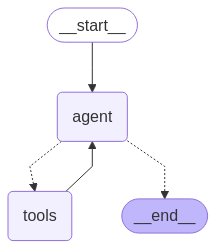

In [18]:
from langgraph.prebuilt import create_react_agent

# Choose the LLM that will drive the agent
prompt = "what is the capital of france"
agent = create_react_agent(llm, tools, prompt=prompt)
agent

In [20]:
result = agent.invoke({})
result

{'messages': [AIMessage(content='The capital of France is Paris.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 18, 'total_tokens': 26, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'meta-llama/Llama-Vision-Free', 'system_fingerprint': None, 'id': 'nrmsXEx-57nCBj-936ea7daab02eaf3', 'finish_reason': 'stop', 'logprobs': None}, id='run-6588d0bc-c618-43d7-8f33-925d53dfc3e6-0', usage_metadata={'input_tokens': 18, 'output_tokens': 8, 'total_tokens': 26, 'input_token_details': {}, 'output_token_details': {}})]}

In [24]:
result['messages'][0].content

'The capital of France is Paris.'

## Defining the Planning Structure

We create type definitions to manage the planning state

In [ ]:
import operator
from typing import Annotated, List, Tuple
from typing_extensions import TypedDict

# Define types for the planning system
class PlanExecute(TypedDict):
    input: str
    plan: List[str]
    past_steps: Annotated[List[Tuple], operator.add]
    response: str

In [ ]:
from pydantic import BaseModel, Field


class Plan(BaseModel):
    """Plan to follow in future"""

    steps: List[str] = Field(
        description="different steps to follow, should be in sorted order"
    )

## Setting up the Planner

The planner is responsible for breaking down complex queries into steps

In [ ]:
# Set up the planner
from langchain_core.prompts import ChatPromptTemplate

planner_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """For the given objective, come up with a simple step by step plan. \
This plan should involve individual tasks, that if executed correctly will yield the correct answer. Do not add any superfluous steps. \
The result of the final step should be the final answer. Make sure that each step has all the information needed - do not skip steps.""",
        ),
        ("placeholder", "{messages}"),
    ]
)

planner = planner_prompt | ChatTogether(model="meta-llama/Llama-3.3-70B-Instruct-Turbo").with_structured_output(Plan)

In [ ]:
final_state = planner.invoke(
    {
        "messages": [
            ("user", "what is the hometown of the current Australia open winner?")
        ]
    }
)

In [ ]:
final_state

Plan(steps=["Find the current year's Australia Open winner", 'Find the hometown of the winner'])

## Defining Core Functions

Three main functions drive the planning process:

1. `execute_step`: Executes a single step of the plan using the agent
2. `plan_step`: Creates the initial plan from the user's query
3. `replan_step`: Revises the plan based on execution results

In [ ]:
from typing import Union


class Response(BaseModel):
    """Response to user."""

    response: str


class Act(BaseModel):
    """Action to perform."""

    action: Union[Response, Plan] = Field(
        description="Action to perform. If you want to respond to user, use Response. "
        "If you need to further use tools to get the answer, use Plan."
    )


replanner_prompt = ChatPromptTemplate.from_template(
    """For the given objective, come up with a simple step by step plan. \
This plan should involve individual tasks, that if executed correctly will yield the correct answer. Do not add any superfluous steps. \
The result of the final step should be the final answer. Make sure that each step has all the information needed - do not skip steps.

Your objective was this:
{input}

Your original plan was this:
{plan}

You have currently done the follow steps:
{past_steps}

Update your plan accordingly. If no more steps are needed and you can return to the user, then respond with that. Otherwise, fill out the plan. Only add steps to the plan that still NEED to be done. Do not return previously done steps as part of the plan."""
)


replanner = replanner_prompt | ChatTogether(model="meta-llama/Llama-3.3-70B-Instruct-Turbo", temperature=0).with_structured_output(Act)

In [ ]:
from typing import Literal
from langgraph.graph import END


async def execute_step(state: PlanExecute):
    plan = state["plan"]
    plan_str = "\n".join(f"{i+1}. {step}" for i, step in enumerate(plan))
    task = plan[0]
    task_formatted = f"""For the following plan:
{plan_str}\n\nYou are tasked with executing step {1}, {task}."""
    agent_response = await agent_executor.ainvoke(
        {"messages": [("user", task_formatted)]}
    )
    return {
        "past_steps": [(task, agent_response["messages"][-1].content)],
    }


async def plan_step(state: PlanExecute):
    plan = await planner.ainvoke({"messages": [("user", state["input"])]})
    return {"plan": plan.steps}


async def replan_step(state: PlanExecute):
    output = await replanner.ainvoke(state)
    if isinstance(output.action, Response):
        return {"response": output.action.response}
    else:
        return {"plan": output.action.steps}


def should_end(state: PlanExecute):
    if "response" in state and state["response"]:
        return END
    else:
        return "agent"

## Building the Workflow Graph

We create a directed graph that coordinates the planning and execution

In [ ]:
from langgraph.graph import StateGraph, START

workflow = StateGraph(PlanExecute)

# Add the plan node
workflow.add_node("planner", plan_step)

# Add the execution step
workflow.add_node("agent", execute_step)

# Add a replan node
workflow.add_node("replan", replan_step)

workflow.add_edge(START, "planner")

# From plan we go to agent
workflow.add_edge("planner", "agent")

# From agent, we replan
workflow.add_edge("agent", "replan")

workflow.add_conditional_edges(
    "replan",
    # Next, we pass in the function that will determine which node is called next.
    should_end,
    ["agent", END],
)

# Finally, we compile it!
# This compiles it into a LangChain Runnable,
# meaning you can use it as you would any other runnable
app = workflow.compile()

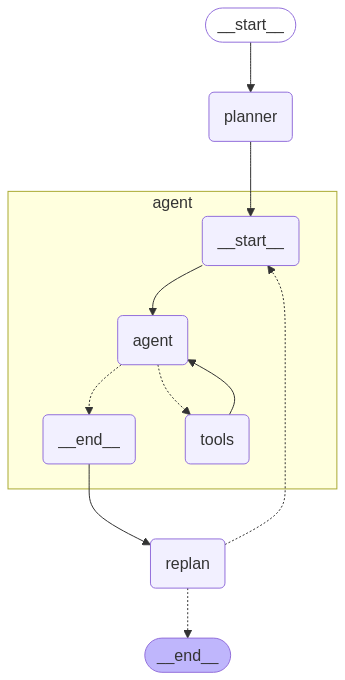

In [ ]:
from IPython.display import Image, display

display(Image(app.get_graph(xray=True).draw_mermaid_png()))

## Example Usage

Let's see how the agent handles a real query!

In [ ]:
config = {"recursion_limit": 25}
inputs = {"input": "what is the hometown of the mens 2024 Australia open winner?"}
try:
    async for event in app.astream(inputs, config=config):
        for k, v in event.items():
            if k != "__end__":
                print(v)
except IndexError as e:
    print(f"Error: {e}. The plan list is empty or index is out of range.")
    print("Execution terminated.")
except Exception as e:
    print(f"An error occurred: {e}")
    print("Execution terminated.")

{'plan': ["Find the winner of the men's 2024 Australia Open", 'Determine the hometown of the winner']}
{'past_steps': [("Find the winner of the men's 2024 Australia Open", "The winner of the men's 2024 Australia Open is Jannik Sinner. \n\nSource: \nhttps://ausopen.com/articles/news/sinner-winner-italian-takes-first-major-ao-2024 \nhttps://www.youtube.com/watch?v=qvY9Jl7CI7U\nhttps://en.wikipedia.org/wiki/2024_Australian_Open \n\nPlease let me know when to proceed with the next step to determine the hometown of the winner.")]}
{'plan': ['Determine the hometown of Jannik Sinner']}
{'past_steps': [('Determine the hometown of Jannik Sinner', "Jannik Sinner's hometown is Sexten in the Dolomites, Northern Italy.")]}
{'plan': []}
Error: list index out of range. The plan list is empty or index is out of range.
Execution terminated.


This demonstrates how complex queries can be broken down and executed systematically, with the agent adapting its plan as new information becomes available.

## Visual Workflow
The graph visualization shows how information flows through the system:
- Start → Planner: Creates initial plan
- Planner → Agent: Executes steps
- Agent → Replan: Updates plan based on new information
- Replan → Either back to Agent or to End

This creates a flexible system that can handle complex, multi-step queries while maintaining context and adapting to new information.